MovieWriter imagemagick unavailable; using Pillow instead.


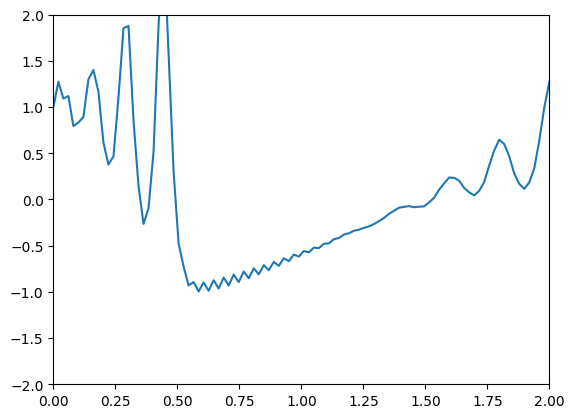

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


alpha = 0.022
longitud = 2.0
tiempo = 10.0
num_puntos = 100
num_tiempos = 1000
dx = longitud / num_puntos
#dt = tiempo / (num_tiempos - 1)
dt = 0.001
num_pasos = int(tiempo / dt)

x = np.linspace(0, longitud, num_puntos)
phi = np.cos(np.pi * x) #condición inicial
phi_viejo = np.copy(phi)

def frontera_periodica(phi):
    phi[0] = phi[-2]
    phi[-1] = phi[1]
    return phi

def evolucion_phi(phi, phi_viejo, dx, dt, alpha):
    phi_nuevo = np.copy(phi)
    for i in range(1, len(phi) - 2):
        #phi_nuevo[i] = -(phi[i] * dt * (phi[i + 1] - phi[i]) / dx) - alpha**2 * dt * (phi[i - 2] + phi[i - 1] - 3*phi[i] + phi[i + 1]) / dx**3

        phi_nuevo[i] = phi_viejo[i] - dt*(((phi[i+1] + phi[i] + phi[i-1]) * (phi[i+1] - phi[i-1]) / (3 * dx)) + alpha**2*((phi[i+2] - 2*phi[i+1] + 2*phi[i-1] - phi[i-2]) / (dx**3)))
    phi_nuevo = frontera_periodica(phi_nuevo)
    return phi_nuevo

"""
phis = [phi]
for t in range(num_tiempos):
    phi = evolucion_phi(phi, phi_viejo, dx, dt, alpha)  # Actualizar phi con el nuevo estado
    phis.append(np.copy(phi))  # Asegurarse de copiar phi para evitar referencias"""


fig, ax = plt.subplots()
ax.set_xlim(0, longitud)
ax.set_ylim(-2, 2)
line, = ax.plot(x, phi)

def animate(i):
    global phi, phi_viejo
    phi_siguiente = evolucion_phi(phi, phi_viejo, dx, dt, alpha)
    phi_viejo = np.copy(phi)
    phi = np.copy(phi_siguiente)
    line.set_ydata(phi)
    return line,


ani = animation.FuncAnimation(fig, animate, frames=500, interval=50, blit=True)
ani.save('3.1.simulacion.gif', writer='imagemagick', fps=30)
plt.show()

3.2

Al disminuir alpha se puede ver que la perturbación en la onda empieza a propagarse simultáneamente desde todos los picos de la onda inicial. Mientras que, al aumentar alpha, obtenemos una onda que se empieza a perturbar desde todos los puntos. Esto conduce a que la onda se perturbe con bastante rapidez. 

3.3

In [30]:
from scipy.integrate import simps

masa = simps(phi, dx=dx)
print(f"Masa: {masa}")

momento = simps(phi**2, dx=dx)
print(f"Momento: {momento}")

dphi_dx = np.gradient(phi, dx)

energia = simps((1/3 * phi**3 - (alpha * dphi_dx)**2), dx=dx)
print(f"Energía: {energia}")

Masa: 0.8595582914277792
Momento: 6.388055032344591
Energía: 1.0719759395754143


Al cambiar el valor de alpha obtenemos valores muy distintos de masa, momento y energía. Por ejemplo, con un alpha de 0.022 obtenemos:

Masa: 0.0895024892069746
Momento: 1.1873340214053874
Energía: 0.09483338294223316

Mientras que si disminuimos alpha, por ejemplo con un alpha de 0.01, obtenemos:

Masa: 0.022331060032028786
Momento: 1.24297690111254
Energía: -0.05343495252860219

Por último, al aumentar alpha, por ejemplo con un alpha de 0.05 obtenemos:

Masa: 0.8595582914277792
Momento: 6.388055032344591
Energía: 1.0719759395754143

Podemos ver que la masa aumenta al aumentar alpha, el momento permanece muy estable con valores de alpha pequeños pero aumenta mucho al usar un valor de alpha más grande, y la enería también amenta al aumentar alpha, incluso tomando un valor negativo cuando alpha es muy pequeño. 

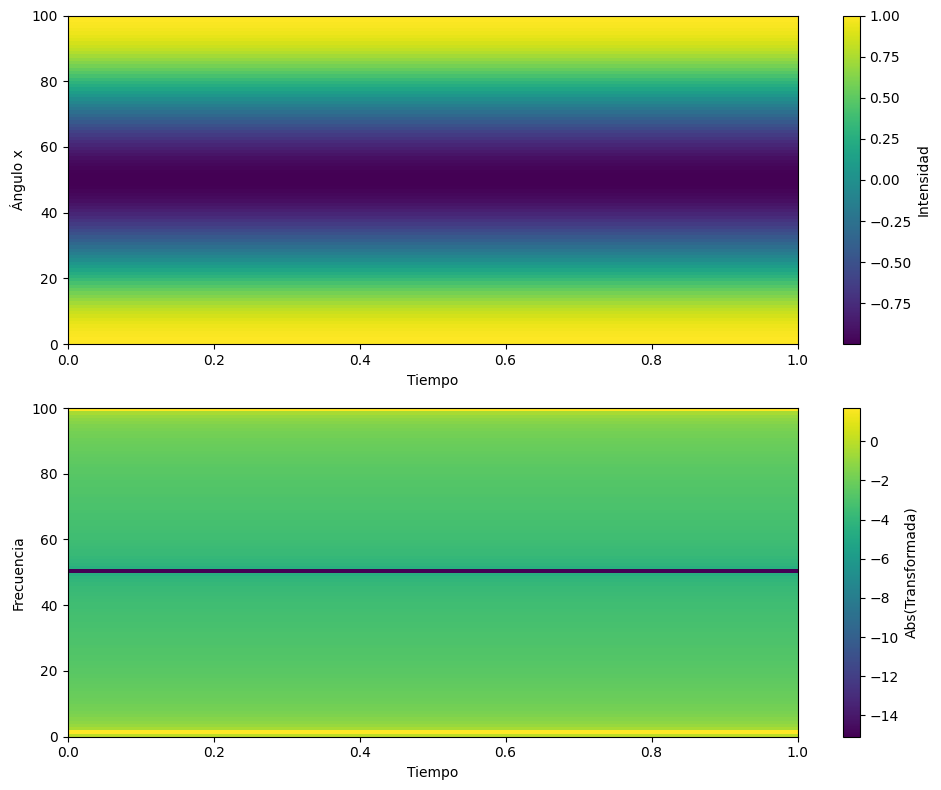

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

transformadas = []


for phi_t in phis:
    fft_phi = np.fft.fft(phi_t)
    fft_magnitude = np.abs(fft_phi)

    transformadas.append(fft_magnitude)


transformadas = np.array(transformadas)


fig, axs = plt.subplots(2, 1, figsize=(10, 8))


grafico1 = axs[0].imshow(np.array(phis).T, aspect='auto', origin='lower', extent=[0, len(phis), 0, len(phis[0])])
axs[0].set_ylabel("Ángulo x")
axs[0].set_xlabel("Tiempo")
fig.colorbar(grafico1, ax=axs[0], label="Intensidad")


grafico2 = axs[1].imshow(np.log10(transformadas.T), aspect='auto', origin='lower', extent=[0, len(transformadas), 0, len(transformadas[0])])
axs[1].set_ylabel("Frecuencia")
axs[1].set_xlabel("Tiempo")
fig.colorbar(grafico2, ax=axs[1], label="Abs(Transformada)")

plt.tight_layout()
plt.show()
